In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../Sampled Dataset/Random 50-50 Sampled Data.csv")
data.head()

,# V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
0,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,-14.924655,...,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,0.400490,1.0
1,0.385108,1.217620,-1.953872,2.087076,-1.144225,-0.576888,-2.582865,0.643230,-1.191233,-3.095094,...,0.594623,0.372144,-0.310456,-0.624065,0.840216,-0.159452,0.599482,0.288916,-0.321245,1.0
2,-1.157678,0.079901,1.790682,-1.968303,-0.589608,0.137942,-0.641184,0.551862,-1.028029,0.331934,...,0.482099,1.359236,-0.271784,-0.269525,0.063426,-0.189034,-0.062240,-0.139962,-0.315248,0.0
3,0.225537,-0.271419,0.500382,-1.936124,-0.383645,-0.294170,-0.009929,0.088852,-0.790604,0.253379,...,0.298460,0.723612,-0.067666,-0.513540,-0.389335,-0.240228,0.047369,0.026852,-0.201302,0.0
4,1.269172,0.444892,0.172031,1.022692,0.015860,-0.732037,0.297024,-0.281962,-0.183246,-0.021727,...,0.018769,0.163191,-0.159069,0.072121,0.777835,-0.310421,0.021357,0.019546,-0.332959,0.0


In [3]:
#data.info()

In [4]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

In [5]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [6]:
print("Number of Genuine transactions train dataset: ", len(X_train))
print("Number of Genuine transactions test dataset: ", len(X_test))
print("Total number of Genuine transactions: ", len(X_train)+len(X_test))

print("Number of Fraudulent transactions train dataset: ", len(y_train))
print("Number of Fraudulent transactions test dataset: ", len(y_test))
print("Total number of Fraudulent transactions: ", len(y_train)+len(y_test))

Number of Genuine transactions train dataset:  688
Number of Genuine transactions test dataset:  296
Total number of Genuine transactions:  984
Number of Fraudulent transactions train dataset:  688
Number of Fraudulent transactions test dataset:  296
Total number of Fraudulent transactions:  984


In [7]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
y_pred = LogReg.predict(X_test)

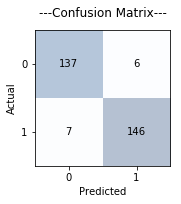

True Positive= 137 , True Negetive= 146 , False Positive= 7 , False Negetive= 6 

The accuracy is 95.6081081081 %
The recall is 95.8041958042 %
The precision is 95.1388888889 %
The F1 Score is 95.4703832753 %


In [9]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm1 = confusion_matrix(y_test, y_pred)

def confusion_matrix_1(CM):
    fig, ax = plot_confusion_matrix(conf_mat=CM)
    plt.title("---Confusion Matrix---")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    
    TP=CM[0,0]
    FN=CM[0,1]
    FP=CM[1,0]
    TN=CM[1,1]
    
    print("True Positive=",TP,", True Negetive=",TN,", False Positive=",FP,", False Negetive=",FN,"\n")
    
    accuracy=(TP+TN)/(TP+FP+FN+TN)
    recall=TP/(TP+FN)
    precision=TP/(TP+FP)
    f1=(2*precision*recall)/(precision+recall)
    
    print("The accuracy is "+str(accuracy*100) + " %")
    print("The recall is "+ str(recall*100) +" %")
    print("The precision is "+ str(precision*100) +" %")
    print("The F1 Score is "+ str(f1*100) +" %")
        
confusion_matrix_1(cm1)